In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from traitlets import validate
import sklearn.model_selection
import numpy as np
import tensorflow as tf
import sklearn.metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
DATA2_PATH=r"C:\Users\B.BASI REDDY\Documents\TB_Chest_Radiography_Database"
DATA2_TRAIN_NORNAL=DATA2_PATH+"/Normal/"
DATA2_TRAIN_Tuberculosis=DATA2_PATH+"/Tuberculosis/"

Normal_img=os.listdir(DATA2_TRAIN_NORNAL)
Tuberculosis_img=os.listdir(DATA2_TRAIN_Tuberculosis)
# DATA2_TRAIN_NORNAL=DATA2_TRAIN_NORNAL+Normal_img
# DATA2_TEST_Tuberculosis=DATA2_TEST_Tuberculosis+Tuberculosis_img
dnorm=pd.DataFrame(Normal_img,columns=["images"])
dnorm["labels"]=0
dnorm["images"]=DATA2_TRAIN_NORNAL+ "/" +dnorm["images"]

dtuber=pd.DataFrame(Tuberculosis_img,columns=["images"])
dtuber["labels"]=1
dtuber["images"]=DATA2_TRAIN_Tuberculosis +"/"+ dtuber["images"]


DF2=pd.concat([dnorm,dtuber],ignore_index=True)
DF2["mat_images"]=DF2['images'].apply(lambda x: cv2.resize(cv2.imread(x,0) ,( 224, 224)))
DF2.sample(frac=1, random_state=42).reset_index(drop=True)

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [3]:
F_DATA=DF2
F_DATA.sample(frac=1, random_state=42).reset_index(drop=True)
F_DATA

,images,labels
0,C:\Users\B.BASI REDDY\Documents\TB_Chest_Radio...,0
1,C:\Users\B.BASI REDDY\Documents\TB_Chest_Radio...,0
2,C:\Users\B.BASI REDDY\Documents\TB_Chest_Radio...,0
3,C:\Users\B.BASI REDDY\Documents\TB_Chest_Radio...,0
4,C:\Users\B.BASI REDDY\Documents\TB_Chest_Radio...,0
...,...,...
76,C:\Users\B.BASI REDDY\Documents\TB_Chest_Radio...,1
77,C:\Users\B.BASI REDDY\Documents\TB_Chest_Radio...,1
78,C:\Users\B.BASI REDDY\Documents\TB_Chest_Radio...,1
79,C:\Users\B.BASI REDDY\Documents\TB_Chest_Radio...,1


In [13]:
X=F_DATA["mat_images"]
Y=F_DATA["labels"]

KeyError: 'mat_images'

In [14]:
X=X/255

NameError: name 'X' is not defined

In [15]:
from tensorflow.keras.utils import to_categorical
Y=to_categorical(Y,4)

NameError: name 'Y' is not defined

In [8]:
 from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.20, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16,)
(16, 4)
(4,)
(4, 4)


In [9]:
X_train = np.array([np.array(x, dtype=np.float32) for x in X_train], dtype=object)
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)

In [10]:
X_test = np.array([np.array(x, dtype=np.float32) for x in X_test], dtype=object)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)

In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16, 224, 224)
(16, 4)
(4, 224, 224)
(4, 4)


In [12]:
import tensorflow as tf
import keras
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'] )
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 128)       1

In [13]:
model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=64) 

Epoch 1/10
1/1 [==============================] - 7s 7s/step - loss: 1.3519 - accuracy: 0.5000 - val_loss: 1.2321 - val_accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 1s 1s/step - loss: 1.1801 - accuracy: 0.5000 - val_loss: 1.9538 - val_accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 1s 1s/step - loss: 2.3519 - accuracy: 0.5000 - val_loss: 0.9478 - val_accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 1s 1s/step - loss: 1.0198 - accuracy: 0.5000 - val_loss: 1.1542 - val_accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 1s 1s/step - loss: 1.1056 - accuracy: 0.5000 - val_loss: 1.0583 - val_accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 1s 1s/step - loss: 1.0084 - accuracy: 0.5000 - val_loss: 0.8208 - val_accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 1s 1s/step - loss: 0.7865 - accuracy: 0.5000 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 8/10
1/1 [=========================

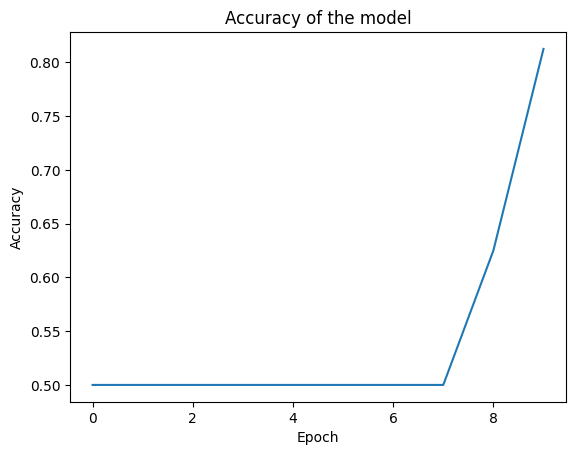

In [14]:
plt.plot(model.history.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy of the model')
plt.show()

In [16]:
y_pred = model.predict(X_test)
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

1/1 [==============================] - 0s 87ms/step


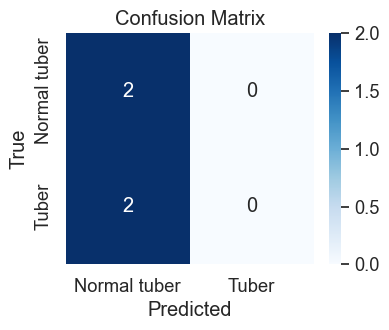

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# Calculate the confusion matrix
confusion = confusion_matrix(y_true,y_pred)
# Define class labels
class_labels = ['Normal tuber', 'Tuber']
# Create a heatmap
plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [1]:
print("Classification Report:")
print(classification_report(y_true,y_pred))

Classification Report:


NameError: name 'classification_report' is not defined

In [22]:
model.save('tbd.keras')